In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fertilizer_df=pd.read_csv('data/FAOSTAT_fertilizer.csv')
cropland_nutrient_df=pd.read_csv('data/FAOSTAT_cropland_nutrient.csv')
food_balances_df=pd.read_csv('data/FAOSTAT_food_balances.csv')
food_balances_carbs_df=pd.read_csv('data/FAOSTAT_food_balances_carbs.csv')
food_balances_old_df=pd.read_csv('data/FAOSTAT_food_balances_old.csv')

# Cropland Fertilizer

<Axes: xlabel='Year', ylabel='Value'>

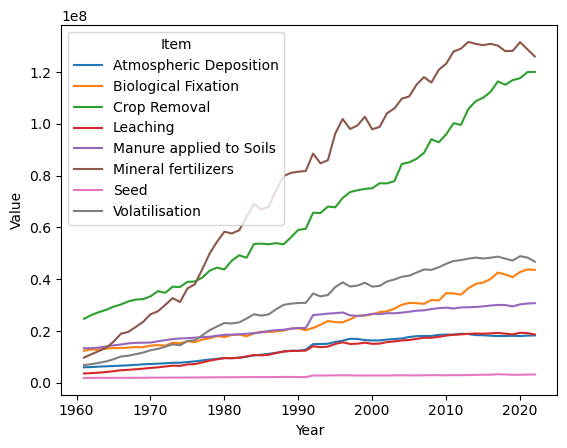

In [69]:
sns.lineplot(cropland_nutrient_df[(cropland_nutrient_df['Element']=='Cropland nitrogen')].groupby(['Item', 'Year'])['Value'].sum().reset_index(), x='Year', y='Value', hue='Item')

Fertilizer: 'Mineral fertilizers' & 'Manure applied to Soils' 

Pollution: 'Volatilisation' & 'Leaching'

In [97]:
ipat_df=pd.DataFrame()
ipat_df['N_pollution']=cropland_nutrient_df[(cropland_nutrient_df['Element']=='Cropland nitrogen') & cropland_nutrient_df['Item'].isin(['Leaching', 'Volatilisation'])].groupby(['Year','Area'])['Value'].sum()
ipat_df['N_use']=cropland_nutrient_df[(cropland_nutrient_df['Element']=='Cropland nitrogen') & cropland_nutrient_df['Item'].isin(['Mineral fertilizers', 'Manure applied to Soils' ])].groupby(['Year','Area'])['Value'].sum()
ipat_df.sort_values('N_pollution', ascending=False)

,,N_pollution,N_use
Year,Area,,
2014,China,1.485945e+07,3.434109e+07
2013,China,1.480922e+07,3.625927e+07
2015,China,1.480364e+07,3.481811e+07
2014,"China, mainland",1.477161e+07,3.573955e+07
2012,China,1.475993e+07,3.584517e+07
...,...,...,...
2000,Maldives,0.000000e+00,9.000000e+00
1998,Maldives,0.000000e+00,9.000000e+00
1973,Maldives,0.000000e+00,9.000000e+00


In [25]:
[country for country in ipat_df.index.get_level_values('Area').unique() if 'mainland' in(country)]

['China, mainland']

# Food

In [26]:
food_balances_df['Item'].unique()

array(['Population', 'Wheat and products', 'Rice and products',
       'Barley and products', 'Maize and products', 'Rye and products',
       'Oats', 'Millet and products', 'Sorghum and products',
       'Cereals, other', 'Cassava and products', 'Potatoes and products',
       'Sweet potatoes'], dtype=object)

In [27]:
food_balances_df[food_balances_df['Element']!='Food supply (kcal)']

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2010,2010,million Kcal,22714261.33,E,Estimated value,NaN
1,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2011,2011,million Kcal,23264732.28,E,Estimated value,NaN
2,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2012,2012,million Kcal,24159167.28,E,Estimated value,NaN
3,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2013,2013,million Kcal,25454589.34,E,Estimated value,NaN
4,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2014,2014,million Kcal,27175651.90,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2018,2018,million Kcal,11362851.44,E,Estimated value,NaN
2380,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2019,2019,million Kcal,11361756.90,E,Estimated value,NaN
2381,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2020,2020,million Kcal,11535757.10,E,Estimated value,NaN
2382,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2021,2021,million Kcal,12016223.71,E,Estimated value,NaN


<Axes: xlabel='Year', ylabel='Value'>

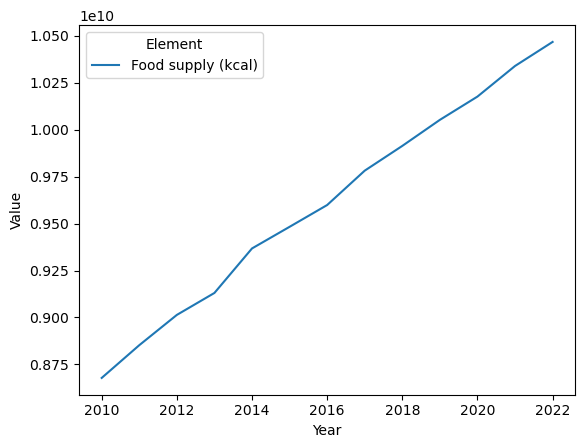

In [77]:
#food_balances_df[food_balances_df['Item']=='Grand Total'].groupby('Element')
sns.lineplot(food_balances_df[food_balances_df['Item']=='Grand Total'].groupby(['Element', 'Year'])['Value'].sum().reset_index(), x='Year', y='Value', hue='Element')

In [30]:
cropland_nutrient_df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,ESB,Cropland Nutrient Balance,4,Afghanistan,7275,Cropland nitrogen,5062,Manure applied to Soils,1961,1961,t,56245.2027,E,Estimated value,NaN
1,ESB,Cropland Nutrient Balance,4,Afghanistan,7276,Cropland nitrogen per unit area,5062,Manure applied to Soils,1961,1961,kg/ha,7.2574,E,Estimated value,NaN
2,ESB,Cropland Nutrient Balance,4,Afghanistan,7275,Cropland nitrogen,5062,Manure applied to Soils,1962,1962,t,57046.4658,E,Estimated value,NaN
3,ESB,Cropland Nutrient Balance,4,Afghanistan,7276,Cropland nitrogen per unit area,5062,Manure applied to Soils,1962,1962,kg/ha,7.3136,E,Estimated value,NaN
4,ESB,Cropland Nutrient Balance,4,Afghanistan,7275,Cropland nitrogen,5062,Manure applied to Soils,1963,1963,t,58594.2449,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154149,ESB,Cropland Nutrient Balance,716,Zimbabwe,7276,Cropland nitrogen per unit area,5083,Volatilisation,2020,2020,kg/ha,4.9512,E,Estimated value,NaN
154150,ESB,Cropland Nutrient Balance,716,Zimbabwe,7275,Cropland nitrogen,5083,Volatilisation,2021,2021,t,16191.2171,E,Estimated value,NaN
154151,ESB,Cropland Nutrient Balance,716,Zimbabwe,7276,Cropland nitrogen per unit area,5083,Volatilisation,2021,2021,kg/ha,5.1623,E,Estimated value,NaN
154152,ESB,Cropland Nutrient Balance,716,Zimbabwe,7275,Cropland nitrogen,5083,Volatilisation,2022,2022,t,16149.8935,E,Estimated value,NaN


In [86]:
data=food_balances_df[food_balances_df['Element']=='Total Population - Both sexes'][['Area','Year','Value']].rename({'Value':'Population'}, axis=1)
data=data.merge(food_balances_df[food_balances_df['Element']=='Food supply (kcal)'][['Area','Year','Value']], on=['Area', 'Year']).rename({'Value':'Food (kcal)'}, axis=1)
#data['Population']*=1000
#data['Food (kcal)']*=1e6
data=data.merge(fertilizer_df[fertilizer_df['Element']=='Agricultural Use'][['Area','Year','Item','Value','Unit']], on=['Area', 'Year']
                ).rename({'Value':'Consumption'}, axis=1
                ).drop_duplicates(['Area', 'Year', 'Item', 'Unit'])
data

,Area,Year,Population,Food (kcal),Item,Consumption,Unit
0,Afghanistan,2010,28189.67,22714261.33,Nutrient nitrogen N (total),12929.01,t
1,Afghanistan,2010,28189.67,22714261.33,Nutrient phosphate P2O5 (total),925.85,t
2,Afghanistan,2010,28189.67,22714261.33,Nutrient potash K2O (total),0.00,t
12,Afghanistan,2011,29249.16,23264732.28,Nutrient nitrogen N (total),22970.63,t
13,Afghanistan,2011,29249.16,23264732.28,Nutrient phosphate P2O5 (total),6845.57,t
...,...,...,...,...,...,...,...
27825,Zimbabwe,2021,15993.52,12016223.71,Nutrient phosphate P2O5 (total),47900.00,t
27826,Zimbabwe,2021,15993.52,12016223.71,Nutrient potash K2O (total),16700.00,t
27836,Zimbabwe,2022,16320.54,12155291.61,Nutrient nitrogen N (total),39300.00,t
27837,Zimbabwe,2022,16320.54,12155291.61,Nutrient phosphate P2O5 (total),47900.00,t


In [94]:
data[(data['Item']=='Nutrient nitrogen N (total)') & (data['Unit']=='t')].groupby('Year').aggregate({'Population':'sum', 'Food (kcal)':'sum','Consumption':'sum'})

,Population,Food (kcal),Consumption
Year,,,
2010,8284483.24,8.673927e+09,1.309007e+08
2011,8356507.95,8.829741e+09,1.351900e+08
2012,8511097.56,9.009878e+09,1.358997e+08
2013,8608549.28,9.126874e+09,1.378133e+08
2014,8705398.95,9.363885e+09,1.391016e+08
2015,8789994.80,9.468662e+09,1.375859e+08
2016,8898354.01,9.597205e+09,1.382556e+08
2017,8993065.44,9.780238e+09,1.396247e+08
2018,9084628.89,9.912904e+09,1.370849e+08


In [95]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats.mstats import gmean

# Sample DataFrame
df=data[(data['Item']=='Nutrient phosphate P2O5 (total)') & (data['Unit']=='t')].groupby('Year').aggregate({'Population':'sum', 'Food (kcal)':'sum','Consumption':'sum'}).reset_index()
df[['Population','Food (kcal)','Consumption']]=df[['Population','Food (kcal)','Consumption']]/df[['Population','Food (kcal)','Consumption']].max()


#df[['Population', 'Food (kcal)', 'Consumption']]=df[['Population', 'Food (kcal)', 'Consumption']]/gmean(df[['Population', 'Food (kcal)', 'Consumption']], axis=1).reshape((13,1))

# Create figure
fig = go.Figure()

# Add traces for each year
for year in df['Year']:
    fig.add_trace(go.Bar(
        x=df.columns[1:],  # Categories
        y=df[df['Year'] == year].values[0][1:],  # Values for that year
        name=str(year),
        visible=(year == df['Year'].iloc[0])  # Only first year visible initially
    ))

# Create slider steps
steps = []
for i, year in enumerate(df['Year']):
    step = {
        'method': 'update',
        'args': [
            {'visible': [j == i for j in range(len(df['Year']))]},  # Show only selected year's bars
            {'title': f"Year: {year}"}
        ],
        'label': str(year)
    }
    steps.append(step)

# Add slider
fig.update_layout(
    sliders=[{
        'active': 0,
        'currentvalue': {"prefix": "Year: "},
        'pad': {"t": 50},
        'steps': steps
    }],
    title="Category Values Over Years",
    xaxis_title="Categories",
    yaxis_title="Values",
    barmode='group',
    #yaxis_type="log",
)

fig.show()


In [27]:
food_balances_df[(food_balances_df['Item']=='Grand Total') & (food_balances_df['Element']=='Food supply (kcal)')]

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
14,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2010,2010,million Kcal,22714261.33,E,Estimated value,NaN
16,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2011,2011,million Kcal,23264732.28,E,Estimated value,NaN
18,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2012,2012,million Kcal,24159167.28,E,Estimated value,NaN
20,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2013,2013,million Kcal,25454589.34,E,Estimated value,NaN
22,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2014,2014,million Kcal,27175651.90,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37821,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2018,2018,million Kcal,11362851.44,E,Estimated value,NaN
37823,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2019,2019,million Kcal,11361756.90,E,Estimated value,NaN
37825,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2020,2020,million Kcal,11535757.10,E,Estimated value,NaN
37827,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2021,2021,million Kcal,12016223.71,E,Estimated value,NaN


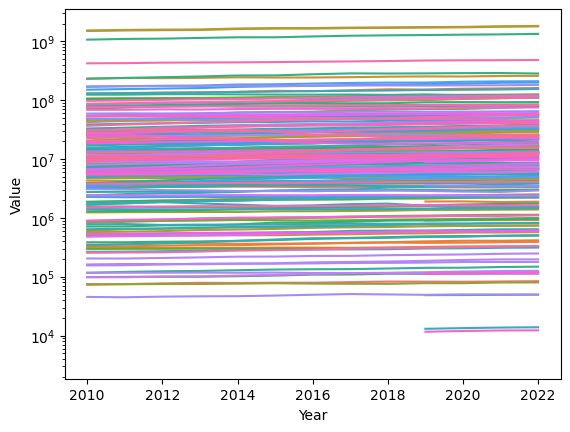

In [28]:
ax = sns.lineplot(
    food_balances_df[(food_balances_df['Item']=='Grand Total') & (food_balances_df['Element']=='Food supply (kcal)')],
    x='Year',
    y='Value',
    hue='Area',
    legend=False
)
ax.set_yscale('log')


In [29]:
food_balances_df[(food_balances_df['Item']=='Grand Total') & (food_balances_df['Element']=='Food supply (kcal)')].sort_values('Value')

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
24305,FBS,Food Balances (2010-),530,Netherlands Antilles (former),661,Food supply (kcal),S2901,Grand Total,2010,2010,million Kcal,3.567050e+03,E,Estimated value,NaN
35029,FBS,Food Balances (2010-),798,Tuvalu,661,Food supply (kcal),S2901,Grand Total,2019,2019,million Kcal,1.160799e+04,E,Estimated value,NaN
35031,FBS,Food Balances (2010-),798,Tuvalu,661,Food supply (kcal),S2901,Grand Total,2020,2020,million Kcal,1.196738e+04,E,Estimated value,NaN
35033,FBS,Food Balances (2010-),798,Tuvalu,661,Food supply (kcal),S2901,Grand Total,2021,2021,million Kcal,1.220026e+04,E,Estimated value,NaN
35035,FBS,Food Balances (2010-),798,Tuvalu,661,Food supply (kcal),S2901,Grand Total,2022,2022,million Kcal,1.226937e+04,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,FBS,Food Balances (2010-),159,China,661,Food supply (kcal),S2901,Grand Total,2020,2020,million Kcal,1.764723e+09,E,Estimated value,NaN
7221,FBS,Food Balances (2010-),156,"China, mainland",661,Food supply (kcal),S2901,Grand Total,2021,2021,million Kcal,1.772204e+09,E,Estimated value,NaN
7223,FBS,Food Balances (2010-),156,"China, mainland",661,Food supply (kcal),S2901,Grand Total,2022,2022,million Kcal,1.796687e+09,E,Estimated value,NaN
6604,FBS,Food Balances (2010-),159,China,661,Food supply (kcal),S2901,Grand Total,2021,2021,million Kcal,1.806664e+09,E,Estimated value,NaN


# Carbs

In [7]:
food_balances_carbs_df['Item'].unique()

array(['Population', 'Wheat and products', 'Rice and products',
       'Barley and products', 'Maize and products', 'Rye and products',
       'Oats', 'Millet and products', 'Sorghum and products',
       'Cereals, other', 'Cassava and products', 'Potatoes and products',
       'Sweet potatoes'], dtype=object)

In [13]:
carb_df=food_balances_carbs_df[food_balances_carbs_df['Element']=='Domestic supply quantity'].pivot(index=['Area','Year'],columns='Item',values='Value').fillna(0).reset_index()

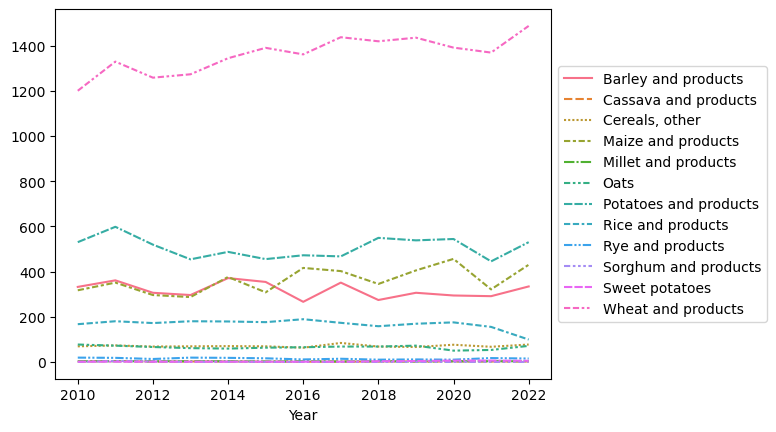

In [92]:
sns.lineplot(carb_df.loc['Switzerland'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.yscale('log')
plt.show()

In [14]:
carb_df['Total'] = carb_df[['Rice and products',
                                    'Barley and products',
                                    'Maize and products',
                                    'Potatoes and products',
                                    'Wheat and products']].sum(axis=1)
carb_df[['rice share',
         'barley share',
         'maize share',
         'potatoes share',
         'wheat share']] = carb_df[['Rice and products',
                                    'Barley and products',
                                    'Maize and products',
                                    'Potatoes and products',
                                    'Wheat and products']].div(carb_df['Total'], axis=0)*100
carb_df

Item,Area,Year,Barley and products,Cassava and products,"Cereals, other",Maize and products,Millet and products,Oats,Potatoes and products,Rice and products,Rye and products,Sorghum and products,Sweet potatoes,Wheat and products,Total,rice share,barley share,maize share,potatoes share,wheat share
0,Afghanistan,2010,449.0,0.0,0.0,301.0,15.0,0.0,220.0,761.0,0.0,0.0,0.0,6209.0,7940.0,9.584383,5.654912,3.790932,2.770781,78.198992
1,Afghanistan,2011,334.0,0.0,0.0,303.0,15.0,0.0,196.0,822.0,0.0,0.0,0.0,6012.0,7667.0,10.721273,4.356332,3.952002,2.556411,78.413982
2,Afghanistan,2012,515.0,0.0,0.0,314.0,15.0,0.0,226.0,829.0,0.0,0.0,0.0,6187.0,8071.0,10.271342,6.380870,3.890472,2.800149,76.657168
3,Afghanistan,2013,510.0,0.0,0.0,313.0,13.0,0.0,500.0,840.0,0.0,0.0,0.0,6639.0,8802.0,9.543286,5.794138,3.556010,5.680527,75.426040
4,Afghanistan,2014,507.0,0.0,0.0,371.0,4.0,0.0,486.0,842.0,0.0,0.0,0.0,6602.0,8808.0,9.559491,5.756131,4.212080,5.517711,74.954587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,Zimbabwe,2018,55.0,252.0,12.0,1607.0,27.0,1.0,24.0,198.0,0.0,78.0,34.0,316.0,2200.0,9.000000,2.500000,73.045455,1.090909,14.363636
2379,Zimbabwe,2019,53.0,255.0,9.0,1490.0,70.0,1.0,19.0,208.0,0.0,69.0,27.0,335.0,2105.0,9.881235,2.517815,70.783848,0.902613,15.914489
2380,Zimbabwe,2020,51.0,268.0,30.0,1996.0,24.0,1.0,22.0,225.0,0.0,139.0,51.0,376.0,2670.0,8.426966,1.910112,74.756554,0.823970,14.082397
2381,Zimbabwe,2021,50.0,268.0,20.0,1665.0,29.0,2.0,29.0,259.0,0.0,112.0,69.0,413.0,2416.0,10.720199,2.069536,68.915563,1.200331,17.094371


In [15]:
import plotly.express as px

# Create the plot with labels
fig = px.scatter_ternary(
    carb_df[carb_df['Year']==2022],#.xs(key=2022, level='Year').reset_index(),
    a="Rice and products",
    b="Wheat and products",
    c="Potatoes and products",
    hover_name="Area",  # This will show the Area when hovering
    # text="Area"      # Alternative: Uncomment to display labels permanently
)

# Optional: Customize the appearance
fig.update_traces(
    marker=dict(size=5, line=dict(width=0)),
    textposition='top center'  # Only needed if using text="Area"
)

fig.show()

In [16]:
# Mapping countries to continents
country2continent = {
    # North America
    "United States": "America",
    "United States of America": "America",
    "Canada": "America",
    "Mexico": "America",
    "Costa Rica": "America",
    "Panama": "America",
    "Jamaica": "America",
    "Cuba": "America",
    "Guatemala": "America",
    "Haiti": "America",
    "Dominican Republic": "America",
    "Bahamas": "America",
    "Belize": "America",
    "El Salvador": "America",
    "Honduras": "America",
    "Nicaragua": "America",
    "Trinidad and Tobago": "America",
    "Saint Lucia": "America",
    "Grenada": "America",
    "Saint Vincent and the Grenadines": "America",
    "Antigua and Barbuda": "America",
    "Barbados": "America",
    "Dominica": "America",
    "Saint Kitts and Nevis": "America",

    # South America
    "Brazil": "America",
    "Argentina": "America",
    "Colombia": "America",
    "Chile": "America",
    "Peru": "America",
    "Venezuela": "America",
    "Venezuela (Bolivarian Republic of)": "America",
    "Ecuador": "America",
    "Bolivia (Plurinational State of)": "America",
    "Paraguay": "America",
    "Uruguay": "America",
    "Guyana": "America",
    "Suriname": "America",

    # Europe
    "United Kingdom": "Europe",
    "France": "Europe",
    "Germany": "Europe",
    "Italy": "Europe",
    "Spain": "Europe",
    "Russia": "Europe",  # (primarily in Europe)
    "Russian Federation": "Europe",
    "Ukraine": "Europe",
    "Poland": "Europe",
    "Netherlands": "Europe",
    "Netherlands (Kingdom of the)": "Europe",
    "Belgium": "Europe",
    "Sweden": "Europe",
    "Norway": "Europe",
    "Finland": "Europe",
    "Switzerland": "Europe",
    "Austria": "Europe",
    "Portugal": "Europe",
    "Greece": "Europe",
    "Denmark": "Europe",
    "Ireland": "Europe",
    "Albania": "Europe",
    "Andorra": "Europe",
    "Armenia": "Europe",  # (culturally/politically often considered Europe)
    "Azerbaijan": "Asia",  # (primarily in Asia)
    "Belarus": "Europe",
    "Bosnia and Herzegovina": "Europe",
    "Bulgaria": "Europe",
    "Croatia": "Europe",
    "Cyprus": "Europe",  # (geographically Asia, but politically/culturally Europe)
    "Czech Republic": "Europe",
    "Czechia": "Europe",
    "Estonia": "Europe",
    "Georgia": "Europe",  # (culturally/politically often considered Europe)
    "Hungary": "Europe",
    "Iceland": "Europe",
    "Latvia": "Europe",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Malta": "Europe",
    "Moldova": "Europe",
    "Republic of Moldova": "Europe",
    "Monaco": "Europe",
    "Montenegro": "Europe",
    "North Macedonia": "Europe",
    "Romania": "Europe",
    "San Marino": "Europe",
    "Serbia": "Europe",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Turkey": "Europe",  # (partially in Europe)
    "Türkiye": "Europe",
    "Vatican City": "Europe",
    "United Kingdom of Great Britain and Northern Ireland": "Europe",

    # Asia
    "China": "Asia",
    "India": "Asia",
    "Japan": "Asia",
    "South Korea": "Asia",
    "Republic of Korea": "Asia",
    "Indonesia": "Asia",
    "Pakistan": "Asia",
    "Bangladesh": "Asia",
    "Vietnam": "Asia",
    "Viet Nam": "Asia",
    "Philippines": "Asia",
    "Thailand": "Asia",
    "Malaysia": "Asia",
    "Singapore": "Asia",
    "Saudi Arabia": "Asia",
    "Iran (Islamic Republic of)": "Asia",
    "Iraq": "Asia",
    "Afghanistan": "Asia",
    "Nepal": "Asia",
    "Bhutan": "Asia",
    "Sri Lanka": "Asia",
    "Myanmar": "Asia",
    "Laos": "Asia",
    "Lao People's Democratic Republic": "Asia",
    "Cambodia": "Asia",
    "Maldives": "Asia",
    "Kazakhstan": "Asia",  # (majority in Asia)
    "Uzbekistan": "Asia",
    "Turkmenistan": "Asia",
    "Kyrgyzstan": "Asia",
    "Tajikistan": "Asia",
    "North Korea": "Asia",
    "Democratic People's Republic of Korea": "Asia",
    "Mongolia": "Asia",
    "Oman": "Asia",
    "United Arab Emirates": "Asia",
    "Qatar": "Asia",
    "Kuwait": "Asia",
    "Yemen": "Asia",
    "Jordan": "Asia",
    "Lebanon": "Asia",
    "Syria": "Asia",
    "Syrian Arab Republic": "Asia",
    "Palestine": "Asia",
    "Israel": "Asia",
    "Brunei": "Asia",
    "Timor-Leste": "Asia",
    "China, Taiwan Province of": "Asia",  # (officially part of China, but listed separately)
    "China, Macao SAR": "Asia",  # (Special Administrative Region of China)
    "Bahrain": "Asia",
    "China, Hong Kong SAR": "Asia",
    "China, mainland": "Asia",

    # Africa
    "South Africa": "Africa",
    "Egypt": "Africa",
    "Nigeria": "Africa",
    "Kenya": "Africa",
    "Ethiopia": "Africa",
    "Ghana": "Africa",
    "Morocco": "Africa",
    "Algeria": "Africa",
    "Tanzania": "Africa",
    "United Republic of Tanzania": "Africa",
    "Uganda": "Africa",
    "Angola": "Africa",
    "Mozambique": "Africa",
    "Sudan": "Africa",
    "South Sudan": "Africa",
    "Somalia": "Africa",
    "Madagascar": "Africa",
    "Cameroon": "Africa",
    "Ivory Coast": "Africa",
    "Côte d'Ivoire": "Africa",
    "Senegal": "Africa",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "Tunisia": "Africa",
    "Libya": "Africa",
    "Chad": "Africa",
    "Niger": "Africa",
    "Mali": "Africa",
    "Burkina Faso": "Africa",
    "Mauritania": "Africa",
    "Benin": "Africa",
    "Togo": "Africa",
    "Sierra Leone": "Africa",
    "Liberia": "Africa",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Gambia": "Africa",
    "Eritrea": "Africa",
    "Djibouti": "Africa",
    "Rwanda": "Africa",
    "Burundi": "Africa",
    "Malawi": "Africa",
    "Namibia": "Africa",
    "Botswana": "Africa",
    "Lesotho": "Africa",
    "Eswatini": "Africa",
    "Mauritius": "Africa",
    "Comoros": "Africa",
    "Seychelles": "Africa",
    "Cape Verde": "Africa",
    "Sao Tome and Principe": "Africa",
    "Equatorial Guinea": "Africa",
    "Central African Republic": "Africa",
    "Republic of the Congo": "Africa",
    "Democratic Republic of the Congo": "Africa",
    "Congo": "Africa",
    "Gabon": "Africa",
    "Cabo Verde": "Africa",

    # Oceania
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    "Fiji": "Oceania",
    "Papua New Guinea": "Oceania",
    "Samoa": "Oceania",
    "Tonga": "Oceania",
    "Solomon Islands": "Oceania",
    "Vanuatu": "Oceania",
    "Kiribati": "Oceania",
    "Micronesia": "Oceania",
    "Marshall Islands": "Oceania",
    "Palau": "Oceania",
    "Nauru": "Oceania",
    "Tuvalu": "Oceania",
    'French Polynesia': "Oceania",
    "Micronesia (Federated States of)": "Oceania",
    "New Caledonia": "Oceania"
}


map = lambda x: country2continent[x]

carb_df['Continent']=carb_df['Area'].apply(map)

In [17]:
import plotly.express as px

# First reset the index if 'Year' and 'Area' are in the index
if isinstance(carb_df.index, pd.MultiIndex):
    carb_df = carb_df.reset_index()

# Create the animated ternary plot
fig = px.scatter_ternary(
    carb_df,
    a="Rice and products",
    b="Wheat and products",
    c="Potatoes and products",
    hover_name="Area",
    animation_frame="Year",  # This creates the slider
    size_max=15,
    color="Continent",  # Optional: color by area for better distinction
    title="Trends in Carbohydrate Consumption Composition"
)

# Improve the animation settings
fig.update_layout(
    ternary=dict(
        aaxis_title="Rice (%)",
        baxis_title="Wheat (%)",
        caxis_title="Potatoes (%)",
        sum=100  # Assuming your data represents percentages
    ),
    sliders=[{
        "active": 0,
        "steps": [{"args": [[frame.name], {"frame": {"duration": 0}}],
                 "label": frame.name,
                 "method": "animate"} for frame in fig.frames]
    }]
)

# Optional: Adjust marker size and animation speed
fig.update_traces(marker=dict(size=12, line=dict(width=1)))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

fig.write_html("plots/yearly_ternary_plot.html")
fig.show()

In [20]:
import plotly.express as px

# Create the base figure with 2022 data
fig = px.choropleth(
    carb_df[carb_df['Year'] == 2022],  # Default to 2022 data
    locations="Area",
    locationmode="country names",
    color='wheat share',  # Default to wheat
    hover_data=carb_df,
    scope="world",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Share of food types (2022)",
    #labels={"wheat share": "Wheat share (%)"}  # Initial colorbar label
)

# Create buttons for each food type
buttons = []
for food in ['rice share',
         'barley share',
         'maize share',
         'potatoes share',
         'wheat share']:
    buttons.append(dict(
        method='update',
        label=food.replace(' share', ''),
        args=[{
            'z': [carb_df[carb_df['Year'] == 2022][food]],  # Update colors
            'hovertext': [carb_df[carb_df['Year'] == 2022]['Area']],  # Keep country names
            'hovertemplate': '<b>%{hovertext}</b><br>' + f'share of {food.replace(' share', '')}: ' + '%{z:.1f}%<extra></extra>'
        }],
        # Update layout elements
        args2=[{
            'title': f"Global {food.replace(' share', '').title()} Share (2022)",
            'coloraxis.colorbar.title': f"{food.replace(' share', '').title()} share (%)"
        }]
    ))

# Add dropdown menu with enhanced styling
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,  # Slightly higher position
        yanchor="top",
        bgcolor="rgba(255,255,255,0.8)",  # Semi-transparent white
        bordercolor="#444",
        font=dict(size=12)
    )],
    coloraxis_colorbar=dict(
        title="Share (%)",
        thickness=15,
        len=0.6
    )
)
fig.write_html("plots/carb_chloropleth.html")
fig.show()

In [21]:
import plotly.express as px

# Create the base figure with 2022 data
fig = px.choropleth(
    carb_df[carb_df['Year'] == 2022],  # Default to 2022 data
    locations="Area",
    locationmode="country names",
    color='wheat share',  # Default to wheat
    hover_data=carb_df,
    scope="world",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Share of food types (2022)",
    range_color=[0, 100]  # This fixes the color scale from 0 to 100
)

# Create buttons for each food type
buttons = []
for food in ['rice share',
         'barley share',
         'maize share',
         'potatoes share',
         'wheat share']:
    buttons.append(dict(
        method='update',
        label=food.replace(' share', ''),
        args=[{
            'z': [carb_df[carb_df['Year'] == 2022][food]],  # Update colors
            'zmin': [0],  # Set minimum value
            'zmax': [100],  # Set maximum value
            'hovertext': [carb_df[carb_df['Year'] == 2022]['Area']],  # Keep country names
            'hovertemplate': '<b>%{hovertext}</b><br>' + f'share of {food.replace(' share', '')}: ' + '%{z:.1f}%<extra></extra>'
        }],
        # Update layout elements
        args2=[{
            'title': f"Global {food.replace(' share', '').title()} Share (2022)",
            'coloraxis.colorbar.title': f"{food.replace(' share', '').title()} share (%)"
        }]
    ))

# Add dropdown menu with enhanced styling
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,  # Slightly higher position
        yanchor="top",
        bgcolor="rgba(255,255,255,0.8)",  # Semi-transparent white
        bordercolor="#444",
        font=dict(size=12)
    )],
    coloraxis_colorbar=dict(
        title="Share (%)",
        thickness=15,
        len=0.6
    )
)
fig.write_html("plots/carb_chloropleth.html")
fig.show()

# Calculate Polution

In [ ]:
def calculate_P():
    carb_df[['rice share','barley share','maize share','potatoes share','wheat share']]*

In [64]:
fertilizer_df = pd.read_excel('final_results.xlsx').T
fertilizer_df.columns=fertilizer_df.loc['product']
fertilizer_df=fertilizer_df.drop('product')[['ricenonbasmati','barley','maize','potato','wheat']]
fertilizer_df

product,ricenonbasmati,barley,maize,potato,wheat
input_nitrogen per kg of product,0.000062,0.000131,NaN,0.000029,0.000139
input_phosphorus per kg of product,0.00016,0.000178,0.000244,0.000075,0.000252
freshwater_eutrophication (kg P-Eq),0.000374,0.000126,0.000183,0.000254,0.000573
unit_freshwater,kg P-Eq,kg P-Eq,kg P-Eq,kg P-Eq,kg P-Eq
marine_eutrophication (kg N-Eq),0.011495,0.009415,0.003253,0.002301,0.005976
unit_marine,kg N-Eq,kg N-Eq,kg N-Eq,kg N-Eq,kg N-Eq


In [94]:
carb_df['phosphorus_input']=np.inner(carb_df[['rice share','barley share','maize share','potatoes share','wheat share']], fertilizer_df.loc['input_phosphorus per kg of product'])
carb_df['freshwater_eutrophication']=np.inner(carb_df[['rice share','barley share','maize share','potatoes share','wheat share']], fertilizer_df.loc['freshwater_eutrophication (kg P-Eq)'])*carb_df['Total']
carb_df

Item,Area,Year,Barley and products,Cassava and products,"Cereals, other",Maize and products,Millet and products,Oats,Potatoes and products,Rice and products,...,Wheat and products,Total,rice share,barley share,maize share,potatoes share,wheat share,Continent,phosphorus_input,freshwater_eutrophication
0,Afghanistan,2010,449.0,0.0,0.0,301.0,15.0,0.0,220.0,761.0,...,6209.0,7940.0,9.584383,5.654912,3.790932,2.770781,78.198992,Asia,0.02337,400.955781
1,Afghanistan,2011,334.0,0.0,0.0,303.0,15.0,0.0,196.0,822.0,...,6012.0,7667.0,10.721273,4.356332,3.952002,2.556411,78.413982,Asia,0.023398,389.927303
2,Afghanistan,2012,515.0,0.0,0.0,314.0,15.0,0.0,226.0,829.0,...,6187.0,8071.0,10.271342,6.380870,3.890472,2.800149,76.657168,Asia,0.023246,403.459493
3,Afghanistan,2013,510.0,0.0,0.0,313.0,13.0,0.0,500.0,840.0,...,6639.0,8802.0,9.543286,5.794138,3.556010,5.680527,75.426040,Asia,0.022849,436.648811
4,Afghanistan,2014,507.0,0.0,0.0,371.0,4.0,0.0,486.0,842.0,...,6602.0,8808.0,9.559491,5.756131,4.212080,5.517711,74.954587,Asia,0.022874,435.270938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,Zimbabwe,2018,55.0,252.0,12.0,1607.0,27.0,1.0,24.0,198.0,...,316.0,2200.0,9.000000,2.500000,73.045455,1.090909,14.363636,Africa,0.02338,56.202658
2379,Zimbabwe,2019,53.0,255.0,9.0,1490.0,70.0,1.0,19.0,208.0,...,335.0,2105.0,9.881235,2.517815,70.783848,0.902613,15.914489,Africa,0.023349,55.373082
2380,Zimbabwe,2020,51.0,268.0,30.0,1996.0,24.0,1.0,22.0,225.0,...,376.0,2670.0,8.426966,1.910112,74.756554,0.823970,14.082397,Africa,0.02351,67.663354
2381,Zimbabwe,2021,50.0,268.0,20.0,1665.0,29.0,2.0,29.0,259.0,...,413.0,2416.0,10.720199,2.069536,68.915563,1.200331,17.094371,Africa,0.023268,65.166004


In [95]:
pop_df=food_balances_carbs_df[food_balances_carbs_df['Element']=='Total Population - Both sexes'].pivot(index=['Area','Year'],columns='Item',values='Value').fillna(0).reset_index()

In [96]:
pop_df['Population']=pop_df['Population']*1000
pop_df

Item,Area,Year,Population
0,Afghanistan,2010,28189670.0
1,Afghanistan,2011,29249160.0
2,Afghanistan,2012,30466480.0
3,Afghanistan,2013,31541210.0
4,Afghanistan,2014,32716210.0
...,...,...,...
2378,Zimbabwe,2018,15052180.0
2379,Zimbabwe,2019,15354610.0
2380,Zimbabwe,2020,15669670.0
2381,Zimbabwe,2021,15993520.0


In [97]:
ipat_df = carb_df[['Continent','Area','Year','Total','rice share','barley share','maize share','potatoes share','wheat share','phosphorus_input','freshwater_eutrophication']]
ipat_df = pd.merge(ipat_df,pop_df, on=['Area','Year'])

In [99]:
ipat_df

Item,Continent,Area,Year,Total,rice share,barley share,maize share,potatoes share,wheat share,phosphorus_input,freshwater_eutrophication,Population
0,Asia,Afghanistan,2010,7940.0,9.584383,5.654912,3.790932,2.770781,78.198992,0.02337,400.955781,28189670.0
1,Asia,Afghanistan,2011,7667.0,10.721273,4.356332,3.952002,2.556411,78.413982,0.023398,389.927303,29249160.0
2,Asia,Afghanistan,2012,8071.0,10.271342,6.380870,3.890472,2.800149,76.657168,0.023246,403.459493,30466480.0
3,Asia,Afghanistan,2013,8802.0,9.543286,5.794138,3.556010,5.680527,75.426040,0.022849,436.648811,31541210.0
4,Asia,Afghanistan,2014,8808.0,9.559491,5.756131,4.212080,5.517711,74.954587,0.022874,435.270938,32716210.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2378,Africa,Zimbabwe,2018,2200.0,9.000000,2.500000,73.045455,1.090909,14.363636,0.02338,56.202658,15052180.0
2379,Africa,Zimbabwe,2019,2105.0,9.881235,2.517815,70.783848,0.902613,15.914489,0.023349,55.373082,15354610.0
2380,Africa,Zimbabwe,2020,2670.0,8.426966,1.910112,74.756554,0.823970,14.082397,0.02351,67.663354,15669670.0
2381,Africa,Zimbabwe,2021,2416.0,10.720199,2.069536,68.915563,1.200331,17.094371,0.023268,65.166004,15993520.0


# Polution Chloropleth

In [103]:
import plotly.express as px
ipat_df['freshwater_eutrophication'] = pd.to_numeric(ipat_df['freshwater_eutrophication'], errors='coerce')
ipat_df['freshwater_eutrophication_pp'] = ipat_df['freshwater_eutrophication']/ipat_df['Population']
# Create the base figure with 2022 data
fig = px.choropleth(
    ipat_df[ipat_df['Year'] == 2022],  # Default to 2022 data
    locations="Area",
    locationmode="country names",
    color='freshwater_eutrophication_pp',  # Default to wheat
    hover_data=ipat_df,
    scope="world",
    #color_continuous_scale=px.colors.sequential.Plasma,
    title="Eutrophication",
    #range_color=[0, 100]  # This fixes the color scale from 0 to 100
)
fig.write_html("plots/eutrophication_chloropleth.html")
fig.show()

In [91]:
import plotly.express as px

# Create the base figure with 2022 data
fig = px.choropleth(
    ipat_df[ipat_df['Year'] == 2022],  # Default to 2022 data
    locations="Area",
    locationmode="country names",
    color='freshwater_eutrophication',  # Variable for coloring
    hover_data=ipat_df,
    scope="world",
    color_continuous_scale=px.colors.sequential.Plasma,  # Continuous color scale
    range_color=[0, 100],  # Fixes the color scale from 0 to 100
    title="Freshwater Eutrophication Impact (2022)",
    labels={'freshwater_eutrophication': 'Impact (%)'}  # Color bar label
)

# Optional: Adjust color bar appearance
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Impact (%)",
        thickness=15,
        len=0.6
    )
)

fig.write_html("plots/eutrophication_chloropleth.html")
fig.show()

# Fruits and Veg

In [239]:
food_balances_fruit_veg_df=pd.read_csv('data/FAOSTAT_food_balances_fruit_veg.csv')
food_balances_fruit_veg_df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FBS,Food Balances (2010-),4,Afghanistan,5142,Food,S2605,"Vegetables, other",2010,2010,1000 t,999.00,I,Imputed value,NaN
1,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2605,"Vegetables, other",2010,2010,million Kcal,234889.39,I,Imputed value,NaN
2,FBS,Food Balances (2010-),4,Afghanistan,5142,Food,S2605,"Vegetables, other",2011,2011,1000 t,889.00,I,Imputed value,NaN
3,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2605,"Vegetables, other",2011,2011,million Kcal,214121.84,I,Imputed value,NaN
4,FBS,Food Balances (2010-),4,Afghanistan,5142,Food,S2605,"Vegetables, other",2012,2012,1000 t,931.00,I,Imputed value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55311,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2625,"Fruits, other",2020,2020,million Kcal,4968.56,I,Imputed value,NaN
55312,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2625,"Fruits, other",2021,2021,1000 t,13.00,I,Imputed value,NaN
55313,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2625,"Fruits, other",2021,2021,million Kcal,6890.84,I,Imputed value,NaN
55314,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2625,"Fruits, other",2022,2022,1000 t,14.00,I,Imputed value,NaN


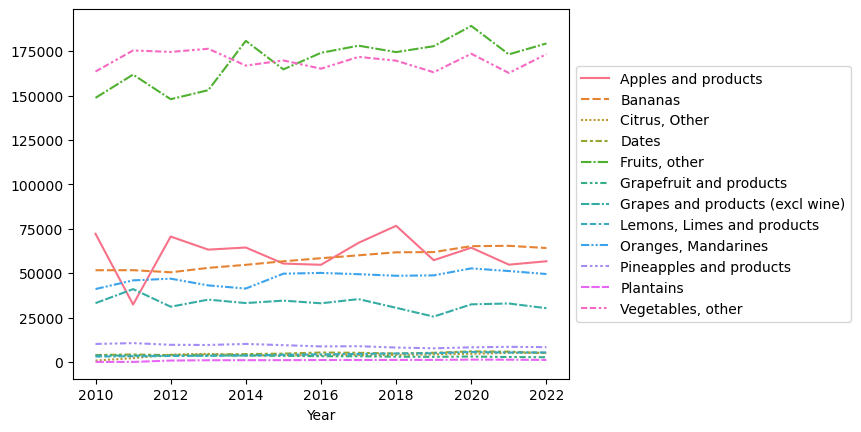

In [272]:
food_df=food_balances_fruit_veg_df[food_balances_fruit_veg_df['Element']=='Food supply (kcal)'].pivot(index=['Area','Year'],columns='Item',values='Value').fillna(0)
sns.lineplot(food_df.loc['Switzerland'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [285]:
food_shares_df=(food_df.drop(['Fruits, other','Vegetables, other'],axis=1).divide(food_df.drop(['Fruits, other','Vegetables, other'],axis=1).sum(axis=1),axis=0)*100).reset_index()
food_types = ['Apples and products',
 'Bananas',
 'Citrus, Other',
 'Dates',
 #'Fruits, other',
 'Grapefruit and products',
 'Grapes and products (excl wine)',
 'Lemons, Limes and products',
 'Oranges, Mandarines',
 'Pineapples and products',
 'Plantains',
 ]#'Vegetables, other']

In [287]:
import plotly.express as px

# Create the base figure with 2022 data
fig = px.choropleth(
    food_shares_df[food_shares_df['Year'] == 2022],  # Default to 2022 data
    locations="Area",
    locationmode="country names",
    color='Apples and products',  # Default to wheat
    hover_data=food_types,
    scope="world",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Share of food types (2022)",
    #labels={"wheat share": "Wheat share (%)"}  # Initial colorbar label
)

# Create buttons for each food type
buttons = []
for food in food_types:
    buttons.append(dict(
        method='update',
        label=food.replace(' share', ''),
        args=[{
            'z': [food_shares_df[food_shares_df['Year'] == 2022][food]],  # Update colors
            'hovertext': [food_shares_df[food_shares_df['Year'] == 2022]['Area']],  # Keep country names
            'hovertemplate': '<b>%{hovertext}</b><br>' + f'share of {food.replace(' share', '')}: ' + '%{z:.1f}%<extra></extra>'
        }],
        # Update layout elements
        args2=[{
            'title': f"Global {food.replace(' share', '').title()} Share (2022)",
            'coloraxis.colorbar.title': f"{food.replace(' share', '').title()} share (%)"
        }]
    ))

# Add dropdown menu with enhanced styling
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,  # Slightly higher position
        yanchor="top",
        bgcolor="rgba(255,255,255,0.8)",  # Semi-transparent white
        bordercolor="#444",
        font=dict(size=12)
    )],
    coloraxis_colorbar=dict(
        title="Share (%)",
        thickness=15,
        len=0.6
    )
)
fig.write_html("plots/fruit_veg_chloropleth.html")
fig.show()

In [282]:
food_shares_df[(food_shares_df['Area']=='Switzerland') & (food_shares_df['Year']==2022)].T#.sort_values()

,2075
Item,
Area,Switzerland
Year,2022
Apples and products,0.248542
Bananas,0.281254
"Citrus, Other",0.022341
Dates,0.02174
Grapefruit and products,0.01154
Grapes and products (excl wine),0.132656
"Lemons, Limes and products",0.023482
